
<a href="https://www.zero-grad.com/">
         <img alt="Zero Grad" src="https://i.postimg.cc/7hJWBrFs/pythondataanalysis.png" >
      </a>

# Data Description

You can get data from WHO : https://covid19.who.int/data

| Field name | Type | Description |
| --- | --- | --- |
| Date_reported | Date | Date of reporting to WHO |
| Country_code | String | ISO Alpha-2 country code |
| Country | String | Country, territory, area |
| WHO_region | String | WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO). |
| New_cases | Integer | New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.* |
| Cumulative_cases | Integer | Cumulative confirmed cases reported to WHO to date. |
| New_deaths | Integer | New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.* |
| Cumulative_deaths | Integer | Cumulative confirmed deaths reported to WHO to date. |

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Exploring the Data

In [2]:
df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
df.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263544 entries, 0 to 263543
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      263544 non-null  object
 1   Country_code       262432 non-null  object
 2   Country            263544 non-null  object
 3   WHO_region         263544 non-null  object
 4   New_cases          263544 non-null  int64 
 5   Cumulative_cases   263544 non-null  int64 
 6   New_deaths         263544 non-null  int64 
 7   Cumulative_deaths  263544 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.1+ MB


In [4]:
df.describe()

New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  2.635440e+05      2.635440e+05  263544.000000       2.635440e+05
mean   2.515716e+03      1.069751e+06      25.452900       1.545278e+04
std    1.610914e+04      5.019489e+06     145.820336       6.762057e+04
min   -1.283800e+04      0.000000e+00   -2437.000000       0.000000e+00
25%    0.000000e+00      9.430000e+02       0.000000       1.000000e+01
50%    1.600000e+01      2.327150e+04       0.000000       2.870000e+02
75%    4.210000e+02      2.924965e+05       4.000000       4.446000e+03
max    1.265520e+06      1.003045e+08   11447.000000       1.088854e+06

In [5]:
# change float format in description
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
count    263,544           263,544     263,544            263,544
mean       2,516         1,069,751          25             15,453
std       16,109         5,019,489         146             67,621
min      -12,838                 0      -2,437                  0
25%            0               943           0                 10
50%           16            23,272           0                287
75%          421           292,496           4              4,446
max    1,265,520       100,304,472      11,447          1,088,854

> Some Pandas Options can be found here : https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

# Duplicate Values

In [6]:
# Check duplicates
df.duplicated().sum()

0

# Missing Values

In [7]:
# Check Missing Values
df.isnull().sum()

Date_reported           0
Country_code         1112
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [8]:
round(df.isna().mean() * 100 ,2)

Date_reported       0
Country_code        0
Country             0
WHO_region          0
New_cases           0
Cumulative_cases    0
New_deaths          0
Cumulative_deaths   0
dtype: float64

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.sample()

date_reported country_code   country who_region  new_cases  \
30344    2020-11-18           BW  Botswana       AFRO        337   

       cumulative_cases  new_deaths  cumulative_deaths  
30344              9103           1                 30

# Date_reported

In [11]:
df.date_reported.dtype

dtype('O')

In [12]:
df.date_reported.describe()

count         263544
unique          1112
top       2020-01-03
freq             237
Name: date_reported, dtype: object

In [13]:
df.date_reported.min(), df.date_reported.max()

('2020-01-03', '2023-01-18')

In [14]:
# Not applicable
# df.date_reported.max() - df.date_reported.min()

In [15]:
# Change date column to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'])

In [16]:
df['date_reported'].dtype

dtype('<M8[ns]')

In [17]:
df['date_reported'].dtype.type

numpy.datetime64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263544 entries, 0 to 263543
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_reported      263544 non-null  datetime64[ns]
 1   country_code       262432 non-null  object        
 2   country            263544 non-null  object        
 3   who_region         263544 non-null  object        
 4   new_cases          263544 non-null  int64         
 5   cumulative_cases   263544 non-null  int64         
 6   new_deaths         263544 non-null  int64         
 7   cumulative_deaths  263544 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 16.1+ MB


In [19]:
# Available now
df.date_reported.max() - df.date_reported.min()

Timedelta('1111 days 00:00:00')

In [20]:
total_period = df.date_reported.max() - df.date_reported.min()
# change to years, months, days
total_years = total_period/ np.timedelta64(1, 'Y')            # could be Y, M, D, W, h, m, s
total_months = total_period/ np.timedelta64(1, 'M')
total_days = total_period/ np.timedelta64(1, 'D')

print(f'Total period: {total_period}')
print(f'Total years: {total_years}')
print(f'Total months: {total_months}')
print(f'Total days: {total_days}')

Total period: 1111 days 00:00:00
Total years: 3.041814684764232
Total months: 36.501776217170786
Total days: 1111.0


In [21]:
from dateutil.relativedelta import relativedelta

relativedelta(df.date_reported.max(), df.date_reported.min())

relativedelta(years=+3, days=+15)

In [22]:
from datetime import datetime

# Get the current date
current_date = datetime.now()    # can specify time zone
current_date

datetime.datetime(2023, 1, 19, 13, 54, 42, 516145)

In [23]:
current_date = datetime.today()
current_date

datetime.datetime(2023, 1, 19, 13, 54, 42, 557851)

In [24]:
relativedelta(df.date_reported.max(), current_date)

relativedelta(days=-1, hours=-13, minutes=-54, seconds=-43, microseconds=+442149)

In [25]:
relativedelta(current_date, df.date_reported.max())

relativedelta(days=+1, hours=+13, minutes=+54, seconds=+42, microseconds=+557851)

# Country_code and Country

In [26]:
df.country_code.nunique(), df.country.nunique()

(236, 237)

In [27]:
df.drop('country_code', axis =1, inplace=True)

In [28]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado

In [29]:
'Egypt' in df.country.unique()

True

# Filter by Country

In [30]:
df[df.country == 'Egypt'].shape

(1112, 7)

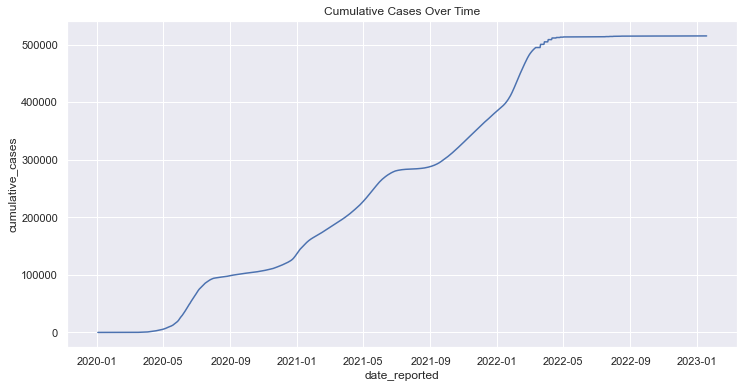

In [31]:
# plot cumulative cases over time
plt.figure(figsize=(12,6))
sns.lineplot(x='date_reported', y='cumulative_cases', data=df[df.country == 'Egypt'])
plt.title('Cumulative Cases Over Time')
plt.show()


In [32]:
# plotly express
px.line(df[df.country == 'Egypt'], x='date_reported', y='cumulative_cases')

In [33]:
px.line(df[df.country == 'Egypt'], x='date_reported', y='cumulative_cases',
         title='Cumulative Cases Over Time', width=800, height=400)

In [34]:
# Function to plot line plot for a country
def cumulative_cases(country):
    fig = px.line(df[df.country == country], x='date_reported', y='cumulative_cases', 
                    title= f'Cumulative Cases Over Time for {country}', width=800, height=400)
    fig.show()

In [35]:
cumulative_cases('Egypt')

In [36]:
cumulative_cases('United States of America')

In [37]:
def cumulative_deaths(country):
    fig = px.line(df[df.country == country], x='date_reported', y='cumulative_deaths',
                     title= f'Cumulative Cases Over Time for {country}', width=800, height=400)
    fig.show()

In [38]:
cumulative_deaths('Egypt')

In [39]:
cumulative_deaths('United States of America')

In [40]:
# Cumulative cases for a specific country over specific period
def cumulative_cases_period(country, start_date, end_date):
    data = df[(df.country == country) & (df.date_reported >= start_date) & (df.date_reported <= end_date)]
    fig = px.line(data, x='date_reported', y='cumulative_cases', title= f'Cumulative Cases for {country} from {start_date} to {end_date}', width=800, height=400)
    fig.show()

In [41]:
cumulative_cases_period('Egypt', '2020-03-01', '2020-05-01')

In [42]:
# Cumulative deaths for a specific country over specific period
def cumulative_deaths_period(country, start_date, end_date):
    data = df[(df.country == country) & (df.date_reported >= start_date) & (df.date_reported <= end_date)]
    fig = px.line(data, x='date_reported', y='cumulative_deaths',
             title= f'Cumulative Deaths for {country} from {start_date} to {end_date}', width=800, height=400, markers=True)
    fig.show()

In [43]:
cumulative_deaths_period('Egypt', '2020-03-01', '2020-05-01')

# Filter by year

In [44]:
# Create Columns for year, month
df['year'] = df.date_reported.dt.year
df['month'] = df.date_reported.dt.month

In [45]:
df.head()

date_reported      country who_region  new_cases  cumulative_cases  \
0    2020-01-03  Afghanistan       EMRO          0                 0   
1    2020-01-04  Afghanistan       EMRO          0                 0   
2    2020-01-05  Afghanistan       EMRO          0                 0   
3    2020-01-06  Afghanistan       EMRO          0                 0   
4    2020-01-07  Afghanistan       EMRO          0                 0   

   new_deaths  cumulative_deaths  year  month  
0           0                  0  2020      1  
1           0                  0  2020      1  
2           0                  0  2020      1  
3           0                  0  2020      1  
4           0                  0  2020      1

<AxesSubplot:xlabel='month', ylabel='new_cases'>

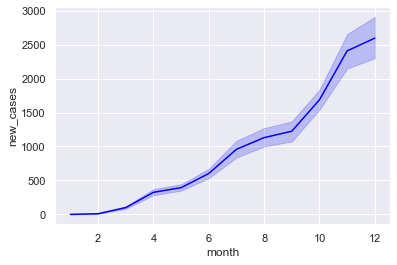

In [46]:
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2020], color='blue')

Text(0.5, 1.0, 'New Cases Over Time')

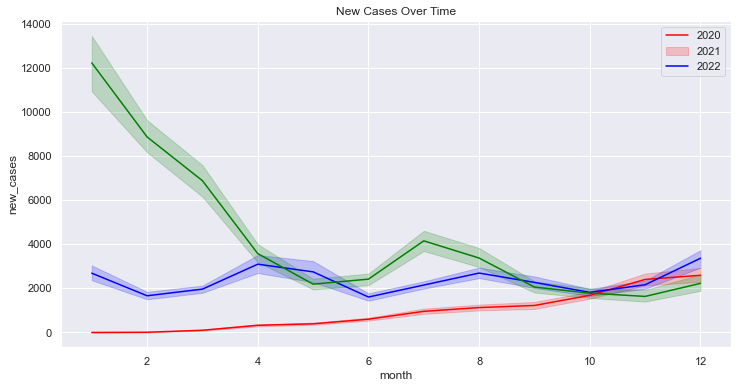

In [47]:
# Plot cumulative cases for each year
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2020], color='red')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2021], color='blue')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2022], color='green')
plt.legend(['2020', '2021', '2022'])
plt.title('New Cases Over Time')

<AxesSubplot:xlabel='month', ylabel='new_cases'>

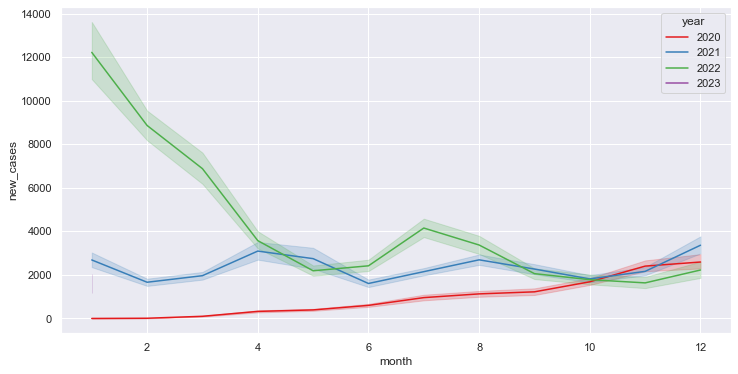

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', hue ='year', data=df, palette='Set1')

# Total Cases

In [49]:
df[df.year==2022].groupby('month')['new_cases'].mean()

month
1    12,228
2     8,869
3     6,885
4     3,577
5     2,192
6     2,420
7     4,156
8     3,376
9     2,060
10    1,784
11    1,636
12    2,228
Name: new_cases, dtype: float64

In [50]:
df.groupby('year')['new_cases'].sum().astype(float)

year
2020    82,936,827
2021   204,173,735
2022   369,100,113
2023     6,791,223
Name: new_cases, dtype: float64

<AxesSubplot:xlabel='month', ylabel='new_cases'>

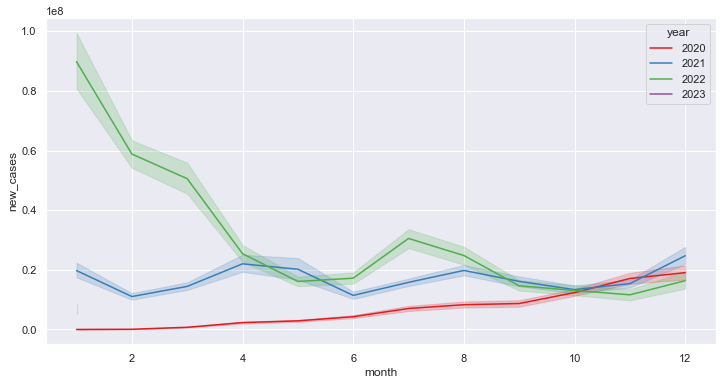

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', hue ='year', data=df, palette='Set1', estimator=np.sum)

In [52]:
df['month_year'] = df.date_reported.dt.to_period('M').astype(str)
df.sample(5)

date_reported                           country who_region  new_cases  \
151208    2022-12-26  Micronesia (Federated States of)       WPRO          0   
194127    2021-10-03                           Romania       EURO      12590   
88756     2022-06-29                             Ghana       AFRO          0   
110906    2022-03-31                              Iraq       EMRO        344   
209412    2020-12-24                      Saudi Arabia       EMRO        177   

        cumulative_cases  new_deaths  cumulative_deaths  year  month  \
151208             22069           0                 58  2022     12   
194127           1257145         184              37394  2021     10   
88756             166133           0               1450  2022      6   
110906           2319209           3              25163  2022      3   
209412            361536           9               6148  2020     12   

       month_year  
151208    2022-12  
194127    2021-10  
88756     2022-06  
110906    2022-03  
209412    2020-12

In [53]:
px.bar(df, x='month_year', y='new_cases', title='New Cases Over Time')

In [54]:
px.histogram(df, x='month_year', y='new_cases', color='year', title='New Cases Over Time')

In [55]:
def total_cases(country, start_date = df.date_reported.min(), end_date = df.date_reported.max()):
    data = df[df.country == country]
    fig = px.histogram(data, x='month_year', y='new_cases', color='year', title=f'Total Cases for {country}',
         width=800, height=400, range_x=[start_date, end_date], nbins=50)
    fig.show()

In [56]:
total_cases('Egypt')

In [57]:
total_cases('Egypt', '2020-03', '2021-03')

In [58]:
total_cases('Egypt', '2020-03-15', '2021-05-15')

# Filter by Region

In [59]:
df.who_region.unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

In [60]:
df[df.who_region == 'EMRO'].country.unique()            # WHO Regional Office for the Eastern Mediterranean

array(['Afghanistan', 'Bahrain', 'Djibouti', 'Egypt',
       'Iran (Islamic Republic of)', 'Iraq', 'Jordan', 'Kuwait',
       'Lebanon', 'Libya', 'Morocco',
       'occupied Palestinian territory, including east Jerusalem', 'Oman',
       'Pakistan', 'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan',
       'Syrian Arab Republic', 'Tunisia', 'United Arab Emirates', 'Yemen'],
      dtype=object)

In [61]:
def total_cases_region(region, start_date = df.date_reported.min(), end_date = df.date_reported.max()):
    data = df[df.who_region == region]
    fig = px.histogram(data, x='month_year', y='new_cases', color='year', title=f'Total Cases for {region}',
         width=800, height=400, range_x=[start_date, end_date])
    fig.show()

In [62]:
total_cases_region('EMRO')

In [63]:
px.bar(df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False),
         title='Total Cases by WHO Region', width=800, height=400)

# Top Countries

In [64]:
data = df.groupby('country')['new_cases'].sum().sort_values(ascending=False)
px.bar(data, title='Total Cases by Country', width=800, height=800)

In [65]:
data = df.groupby('country')['cumulative_cases'].max().sort_values(ascending=False)
px.bar(data, title='Cumulative Cases by Country', width=800, height=800)

In [66]:
data = df[df['who_region'] == 'EMRO'].groupby('country')['cumulative_cases'].max().sort_values(ascending=False)
px.bar(data, title='Cumulative Cases by Country in EMRO Region', width=800, height=800)

In [67]:
data = df[df['who_region'] == 'EMRO'].groupby('country')['cumulative_deaths'].max().sort_values(ascending=False)
fig = px.bar(data, title='Cumulative Deaths by Country in EMRO Region', width=800, height=800)
fig.update(layout_showlegend=False)
fig.show()

In [68]:
df[df['new_cases'] < 0]

date_reported                       country who_region  new_cases  \
74        2020-03-17                   Afghanistan       EMRO         -1   
8267      2021-04-30           Antigua and Barbuda       AMRO         -8   
11196     2020-03-19                         Aruba       AMRO         -4   
11768     2021-10-12                         Aruba       AMRO        -53   
23066     2022-04-08                        Belize       AMRO        -48   
...              ...                           ...        ...        ...   
252499    2020-03-18  United States Virgin Islands       AMRO         -4   
252702    2020-10-07  United States Virgin Islands       AMRO         -5   
252703    2020-10-08  United States Virgin Islands       AMRO         -1   
252711    2020-10-16  United States Virgin Islands       AMRO         -1   
253639    2020-04-15                       Uruguay       AMRO        -29   

        cumulative_cases  new_deaths  cumulative_deaths  year  month  \
74                    24           0                  0  2020      3   
8267                1224           0                 32  2021      4   
11196                  4           0                  0  2020      3   
11768              15534           1                170  2021     10   
23066              57270           4                660  2022      4   
...                  ...         ...                ...   ...    ...   
252499                 2           0                  0  2020      3   
252702              1322           0                 20  2020     10   
252703              1321           0                 20  2020     10   
252711              1327           0                 20  2020     10   
253639               483           1                  8  2020      4   

       month_year  
74        2020-03  
8267      2021-04  
11196     2020-03  
11768     2021-10  
23066     2022-04  
...           ...  
252499    2020-03  
252702    2020-10  
252703    2020-10  
252711    2020-10  
253639    2020-04  

[74 rows x 10 columns]

In [69]:
df[df['new_deaths'] < 0]

date_reported                   country who_region  new_cases  \
15808     2020-08-30                   Bahamas       AMRO         37   
18438     2021-10-10                Bangladesh      SEARO        481   
22661     2021-02-27                    Belize       AMRO          9   
30818     2022-03-07                  Botswana       AFRO         18   
38540     2022-01-04                Cabo Verde       AFRO        756   
49800     2022-05-24                   Comoros       AFRO          0   
80666     2021-08-27                    France       EURO      18812   
80675     2021-09-05                    France       EURO      13143   
93524     2020-04-28                Guadeloupe       AMRO          0   
93705     2020-10-26                Guadeloupe       AMRO          0   
95743     2020-04-23                 Guatemala       AMRO         22   
95754     2020-05-04                 Guatemala       AMRO         44   
103791    2021-01-12                  Honduras       AMRO        719   
116531    2022-06-04                   Jamaica       AMRO        386   
148061    2020-06-16                   Mayotte       AFRO         28   
180542    2021-02-04          Papua New Guinea       WPRO          0   
192611    2020-08-25                   Réunion       AFRO         35   
214388    2022-06-05              Sierra Leone       AFRO          0   
215014    2021-02-04                 Singapore       WPRO         18   
216368    2021-10-04            Sint Eustatius       AMRO          0   
216375    2021-10-11            Sint Eustatius       AMRO          0   
225832    2020-04-08                 Sri Lanka      SEARO          6   
233844    2020-11-22                  Thailand      SEARO         11   
252115    2022-03-16  United States of America       AMRO      60969   
252336    2022-10-23  United States of America       AMRO     -12838   
254136    2021-08-25                   Uruguay       AMRO         87   
258382    2021-02-04                  Viet Nam       WPRO         57   

        cumulative_cases  new_deaths  cumulative_deaths  year  month  \
15808               2057         -10                 40  2020      8   
18438            1562359          -6              27688  2021     10   
22661              12280          -1                314  2021      2   
30818             304931          -8               2667  2022      3   
38540              43567          -1                352  2022      1   
49800               8120          -1                160  2022      5   
80666            6511793          -6             112390  2021      8   
80675            6627205         -32             112981  2021      9   
93524                149          -3                 10  2020      4   
93705               7474          -1                126  2020     10   
95743                316          -1                  8  2020      4   
95754                688          -1                 17  2020      5   
103791            127945          -2               3273  2021      1   
116531            138110          -1               3068  2022      6   
148061              2310          -1                 28  2020      6   
180542               867          -9                  0  2021      2   
192611              1244          -4                  2  2020      8   
214388              7682          -1                125  2022      6   
215014             59602         -29                  0  2021      2   
216368                28          -1                  0  2021     10   
216375                28          -1                  0  2021     10   
225832               186          -6                  0  2020      4   
233844              3913         -60                  0  2020     11   
252115          78983223       -2437             963710  2022      3   
252336          95937570         -31            1057010  2022     10   
254136            384181          -1               6015  2021      8   
258382              1948         -35          

* ### New Cases and New Deaths may be negative due to data correction as per WHO : https://covid19.who.int/data

In [70]:
df[df.new_cases == df.new_cases.max()]

date_reported                   country who_region  new_cases  \
252052    2022-01-12  United States of America       AMRO    1265520   

        cumulative_cases  new_deaths  cumulative_deaths  year  month  \
252052          61474599        1962             836979  2022      1   

       month_year  
252052    2022-01

In [71]:
df.query('new_cases == new_cases.max()')

date_reported                   country who_region  new_cases  \
252052    2022-01-12  United States of America       AMRO    1265520   

        cumulative_cases  new_deaths  cumulative_deaths  year  month  \
252052          61474599        1962             836979  2022      1   

       month_year  
252052    2022-01

In [72]:
max_new_cases = df[df.new_cases == df.new_cases.max()]
max_new_cases['country']

252052    United States of America
Name: country, dtype: object

In [73]:
max_new_cases['country'].iloc[0]

'United States of America'

In [74]:
max_new_cases['country'].values

array(['United States of America'], dtype=object)

In [75]:
max_new_cases['country'].values[0]

'United States of America'

In [76]:
print(f'The country with the most new cases is {max_new_cases["country"].iloc[0]} ')
print(f'The date with the most new cases is {max_new_cases["date_reported"].iloc[0]} ')

The country with the most new cases is United States of America 
The date with the most new cases is 2022-01-12 00:00:00 


In [77]:
max_new_cases.date_reported.dt.day_name()

252052    Wednesday
Name: date_reported, dtype: object

In [78]:
max_new_cases.date_reported.dt.day_name().values[0]

'Wednesday'

In [79]:
# change date format
max_new_cases.date_reported.dt.strftime('%d-%m-%Y')

252052    12-01-2022
Name: date_reported, dtype: object

In [80]:
max_new_cases.date_reported.dt.strftime('%d-%m-%Y').iloc[0]

'12-01-2022'

In [81]:
max_new_cases.date_reported.iloc[0]

Timestamp('2022-01-12 00:00:00')

In [82]:
df.date_reported = df.date_reported.dt.strftime('%d-%m-%Y')

In [83]:
df.date_reported.dtype

dtype('O')

In [84]:
max_new_cases.date_reported.iloc[0]

Timestamp('2022-01-12 00:00:00')

In [85]:
max_new_cases = df[df.new_cases == df.new_cases.max()]
max_new_cases.date_reported.iloc[0]

'12-01-2022'

In [86]:
df.groupby('country')['new_cases'].max().nlargest(10)

country
United States of America    1265520
Republic of Korea            621328
France                       500563
Viet Nam                     454212
India                        414188
Türkiye                      406321
Netherlands                  391606
Japan                        326090
Germany                      307933
Brazil                       298408
Name: new_cases, dtype: int64

In [87]:
fig = px.bar(df.groupby('country')['new_cases'].max().nlargest(10), title='Top 10 Countries with the Most New Cases', width=800, height=600)
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Cases')
fig.show()

In [88]:
fig = px.bar(df.groupby('country')['new_deaths'].max().nlargest(10),
         title='Top 10 Countries with the Most New Deaths', width=800, height=600, orientation='h')
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Deaths')
fig.show()

In [89]:
fig = px.bar(df.groupby('country')['new_deaths'].max().nlargest(10).sort_values(ascending= True),
         title='Top 10 Countries with the Most New Deaths', width=800, height=600, orientation='h')
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Deaths')
fig.show()

In [90]:
def top10_countries(data, column):
    data = data.groupby('country')[column].max().nlargest(10)
    fig = px.bar(data, title=f'Top 10 Countries with the Most {column}', width=800, height=600)
    fig.update(layout_showlegend=False)
    fig.update_layout(xaxis_title='Country', yaxis_title=column)
    fig.show()

In [91]:
top10_countries(df, 'new_cases')

In [92]:
top10_countries(df, 'new_deaths')

In [93]:
top10_countries(df, 'cumulative_cases')

In [94]:
top10_countries(df, 'cumulative_deaths')

In [95]:
# 4 subplots in one figure plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [96]:
data = df.groupby('country').max()
data

date_reported who_region  \
country                                                                       
Afghanistan                                           31-12-2022       EMRO   
Albania                                               31-12-2022       EURO   
Algeria                                               31-12-2022       AFRO   
American Samoa                                        31-12-2022       WPRO   
Andorra                                               31-12-2022       EURO   
...                                                          ...        ...   
Wallis and Futuna                                     31-12-2022       WPRO   
Yemen                                                 31-12-2022       EMRO   
Zambia                                                31-12-2022       AFRO   
Zimbabwe                                              31-12-2022       AFRO   
occupied Palestinian territory, including east ...    31-12-2022       EMRO   

                                                    new_cases  \
country                                                         
Afghanistan                                              3243   
Albania                                                  2832   
Algeria                                                  2521   
American Samoa                                            955   
Andorra                                                  1676   
...                                                       ...   
Wallis and Futuna                                        2654   
Yemen                                                     287   
Zambia                                                   5555   
Zimbabwe                                                 6181   
occupied Palestinian territory, including east ...      11016   

                                                    cumulative_cases  \
country                                                                
Afghanistan                                                   208009   
Albania                                                       333072   
Algeria                                                       271287   
American Samoa                                                  8309   
Andorra                                                        47781   
...                                                              ...   
Wallis and Futuna                                               3427   
Yemen                                                          11945   
Zambia                                                        337458   
Zimbabwe                                                      259947   
occupied Palestinian territory, including east ...            703228   

                                                    new_deaths  \
country                                                          
Afghanistan                                                159   
Albania                                                     21   
Algeria                                                     49   
American Samoa                                               5   
Andorra                                                      6   
...                                                        ...   
Wallis and Futuna                                            7   
Yemen                                                       60   
Zambia                                                      72   
Zimbabwe                                                   107   
occupied Palestinian territory, including east ...          34   

                                                    cumulative_deaths  year  \
country                                                                       
Afghanistan                                                      7859  2023   
Albania                                                          3596  2023   
Algeria                                                          

In [97]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('New Cases', 'New Deaths', 'Cumulative Cases', 'Cumulative Deaths'))

fig.add_trace(go.Bar(x=data['new_cases'].nlargest(10).index, y=data['new_cases'].nlargest(10).values), row=1, col=1)
fig.add_trace(go.Bar(x=data['new_deaths'].nlargest(10).index, y=data['new_deaths'].nlargest(10).values), row=1, col=2)
fig.add_trace(go.Bar(x=data['cumulative_cases'].nlargest(10).index, y=data['cumulative_cases'].nlargest(10).values), row=2, col=1)
fig.add_trace(go.Bar(x=data['cumulative_deaths'].nlargest(10).index, y=data['cumulative_deaths'].nlargest(10).values), row=2, col=2)


fig.update(layout_showlegend=False)
fig.update_layout(height=900, width=1200, title_text='Top 10 Countries with the Most Cases and Deaths')
fig.show()

# Create Easy Maps

In [98]:
df_all_max = df.groupby('country').max()
df_2021_max = df[df.year == 2021].groupby('country').max()
df_2022_max = df[df.year == 2022].groupby('country').sum()

In [99]:
px.choropleth(df_all_max, locations=df_all_max.index, locationmode='country names', color=df_all_max['cumulative_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues

# More Sophisticated Maps

Implemented according to : https://medium.com/analytics-vidhya/hello-world-covid19-visualization-eb6736e1dec with some modifications

In [100]:
data = dict(type = 'choropleth',                    #  ‘choropleth’ specifies that we are plotting a choropleth map
           locations = df_2021_max.index,           # list of country names
            locationmode = 'country names',         # the plotting level is country wise. The value can be “ISO-3” , “USA-states” , “country names”
            z = df_2021_max['cumulative_cases'],    # The value or factor that is used to distinguish the countries. These values are used by the colour scale.
            text = df_2021_max.index,               # The textual information to be displayed for each country on hover.
            colorscale= 'agsunset',                 
            reversescale = False,
            marker = dict(line = dict(color='white',width=1)),
            colorbar = {'title':'cumulative_cases'})

Available color scales are:

> ‘Greys’, ‘YlGnBu’, ‘Greens’, ‘YlOrRd’, ‘Bluered’, ‘RdBu’, ‘Reds’, ‘Blues’, ‘Picnic’, ‘Rainbow’, ‘Portland’, ‘Jet’, ‘Hot’, ‘Blackbody’, ‘Earth’, ‘Electric’, ‘Viridis’, ‘Cividis’

In [101]:
layout = dict(title = 'World wide Cumulative Cases in 2021',
             geo = dict(showframe = False, projection = {'type':'mollweide'}))   # equirectangular 

* Available projections :
> ‘equirectangular’, ‘mercator’, ‘orthographic’, ‘natural earth’, ‘kavrayskiy7’, ‘miller’, ‘robinson’, ‘eckert4’, ‘azimuthal equal area’, ‘azimuthal equidistant’, ‘conic equal area’, ‘conic conformal’, ‘conic equidistant’, ‘gnomonic’, ‘stereographic’, ‘mollweide’, ‘hammer’, ‘transverse mercator’, ‘albers usa’, ‘winkel tripel’, ‘aitoff’, ‘sinusoidal’.

In [102]:
go.Figure(data=[data],layout=layout)

In [103]:
def plot_map(data, column):
    data = dict(type = 'choropleth',
           locations = data.index,
            locationmode = 'country names',
            z = data[column],
            text = data.index,
            colorscale= 'agsunset',
            reversescale = False,
            marker = dict(line = dict(color='white',width=1)),
            colorbar = {'title': column } )

    layout = dict(title = f'World wide {column} covid19 cases',
             geo = dict(showframe = False, projection = {'type':'natural earth'}))

    choromap = go.Figure(data=[data],layout=layout)
    choromap.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, width=1000, height=600)
    return(choromap)

In [104]:
plot_map(df_2021_max, 'cumulative_cases')

In [105]:
plot_map(df_all_max, 'cumulative_cases')

In [106]:
plot_map(df_all_max, 'cumulative_deaths')

In [107]:
choromap = px.choropleth(df_2022_max, locations=df_2022_max.index, locationmode='country names', color=df_2022_max['new_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues

choromap.show()

* For reference : https://plotly.com/python/choropleth-maps/

# save the figure

In [108]:
#!pip install -U kaleido

In [109]:
# save the plot as html file
choromap.write_html('choromap.html')

# Dash

In [110]:
# Run the following lines locally
#!pip install dash
import dash
#from dash import html, dcc
import dash_core_components as dcc
import dash_html_components as html

fig = px.choropleth(df_2022_max, locations=df_2022_max.index, locationmode='country names', color=df_2022_max['new_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues
fig2 = plot_map(df_all_max, 'cumulative_cases')

app = dash.Dash()
app.layout = html.Div([ html.H1('World wide Cumulative Cases covid19 cases in 2022'),
                        dcc.Graph(figure=fig, id='my-graph'),
                        html.H2('World wide Cumulative Cases covid19 cases in 3 years'),
                        dcc.Graph(figure=fig2, id='my-graph2')])

app.run_server(debug=False, use_reloader=False, port=8050)

 * Serving Flask app "dash" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Jan/2023 13:55:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2023 13:55:27] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2023 13:55:27] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2023 13:55:28] "GET /favicon.ico HTTP/1.1" 200 -


In [ ]:
# # Run the following lines on Colab or Jupyter (Inline Mode)
# #!pip install jupyter-dash
# import dash_core_components as dcc
# import dash_html_components as html
# from jupyter_dash import JupyterDash

# fig = px.choropleth(df_2022_max, locations=df_2022_max.index, locationmode='country names', color=df_2022_max['new_cases'],
#             width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues
# fig2 = plot_map(df_all_max, 'cumulative_cases')

# app = JupyterDash()
# app.layout = html.Div([ html.H1('World wide Cumulative Cases covid19 cases in 2022'),
#                         dcc.Graph(figure=fig, id='my-graph'),
#                         html.H2('World wide Cumulative Cases covid19 cases in 3 years'),
#                         dcc.Graph(figure=fig2, id='my-graph2')])
 
# app.run_server(mode='inline',host="0.0.0.0",port=1005)